# Project Students Marks

In [16]:
import mysql.connector

In [17]:
import pandas as pd
con=mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password="Karan@1106",
    database="mysql")

In [18]:
df=pd.read_sql_query("Select * from Stud_marks",con)
df.head()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,History,Civics,Age,physical_edu
0,sjohn,M,1999-11-12,55,45,56,87,21,52,89,None,None
1,Suresh,M,2017-05-01,75,96,78,64,90,61,58,None,None
2,Ramesh,M,2017-05-02,25,54,89,76,95,87,56,None,None
3,Jessica,F,2017-05-15,78,96,86,63,54,89,75,None,None
4,Jennifer,F,None,58,96,78,46,96,77,83,None,None


In [19]:
df=df.drop('DOB',axis=1)

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le_count=0
for col in df.columns:
    df[col]=le.fit_transform(df[col])

In [21]:
df.describe()

,Name,Gender,Maths,Physics,Chemistry,English,Biology,History,Civics,Age,physical_edu
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.00000,10.000000,10.00000,10.0,10.0
mean,4.50000,0.500000,3.400000,4.200000,3.900000,4.50000,4.50000,4.400000,4.50000,0.0,0.0
std,3.02765,0.527046,2.170509,2.616189,2.424413,3.02765,3.02765,2.875181,3.02765,0.0,0.0
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.0,0.0
25%,2.25000,0.000000,2.250000,2.250000,2.250000,2.25000,2.25000,2.250000,2.25000,0.0,0.0
50%,4.50000,0.500000,3.000000,4.500000,4.000000,4.50000,4.50000,4.500000,4.50000,0.0,0.0
75%,6.75000,1.000000,4.750000,6.750000,5.750000,6.75000,6.75000,6.750000,6.75000,0.0,0.0
max,9.00000,1.000000,7.000000,7.000000,7.000000,9.00000,9.00000,8.000000,9.00000,0.0,0.0


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.stats import zscore

In [23]:
df.isnull().sum()

Name            0
Gender          0
Maths           0
Physics         0
Chemistry       0
English         0
Biology         0
History         0
Civics          0
Age             0
physical_edu    0
dtype: int64

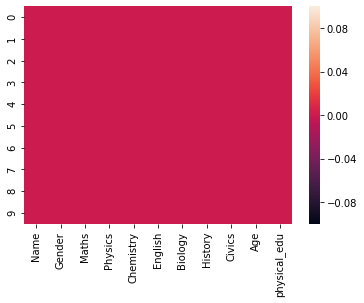

In [24]:
sns.heatmap(df.isnull())

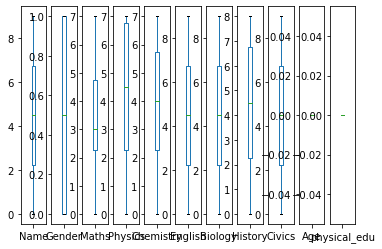

In [25]:
df.plot(kind="box",subplots=True)
plt.show()

Checking the outliers

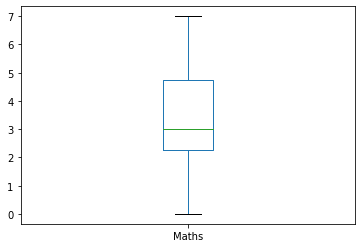

In [26]:
df["Maths"].plot.box()

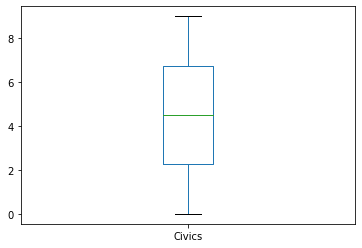

In [27]:
df["Civics"].plot.box()

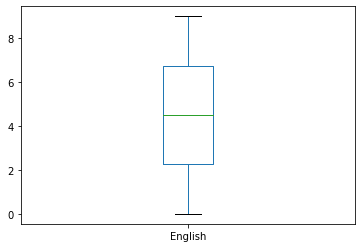

In [28]:
df["English"].plot.box()

In [31]:
df.isnull().sum()

Name            0
Gender          0
Maths           0
Physics         0
Chemistry       0
English         0
Biology         0
History         0
Civics          0
Age             0
physical_edu    0
dtype: int64

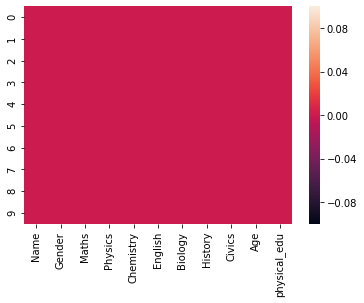

In [32]:
sns.heatmap(df.isnull())

In [33]:
df.corr()

,Name,Gender,Maths,Physics,Chemistry,English,Biology,History,Civics,Age,physical_edu
Name,1.000000,0.591864,0.033816,-0.364717,-0.143803,-0.103030,-0.260606,-0.740312,-0.030303,NaN,NaN
Gender,0.591864,1.000000,0.000000,-0.483494,0.130435,0.243709,-0.174078,-0.366618,-0.313340,NaN,NaN
Maths,0.033816,0.000000,1.000000,0.121316,-0.076014,-0.169079,-0.067632,0.060535,-0.287435,NaN,NaN
Physics,-0.364717,-0.483494,0.121316,1.000000,0.056057,-0.547076,0.252496,0.298383,0.196386,NaN,NaN
Chemistry,-0.143803,0.130435,-0.076014,0.056057,1.000000,-0.431410,0.370861,0.086075,-0.507096,NaN,NaN
English,-0.103030,0.243709,-0.169079,-0.547076,-0.431410,1.000000,-0.296970,0.242516,-0.006061,NaN,NaN
Biology,-0.260606,-0.174078,-0.067632,0.252496,0.370861,-0.296970,1.000000,0.293572,-0.478788,NaN,NaN
History,-0.740312,-0.366618,0.060535,0.298383,0.086075,0.242516,0.293572,1.000000,-0.255280,NaN,NaN
Civics,-0.030303,-0.313340,-0.287435,0.196386,-0.507096,-0.006061,-0.478788,-0.255280,1.000000,NaN,NaN
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


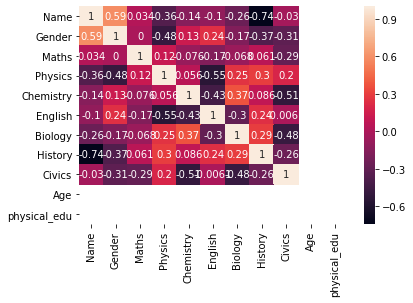

In [34]:
sns.heatmap(df.corr(),annot=True)

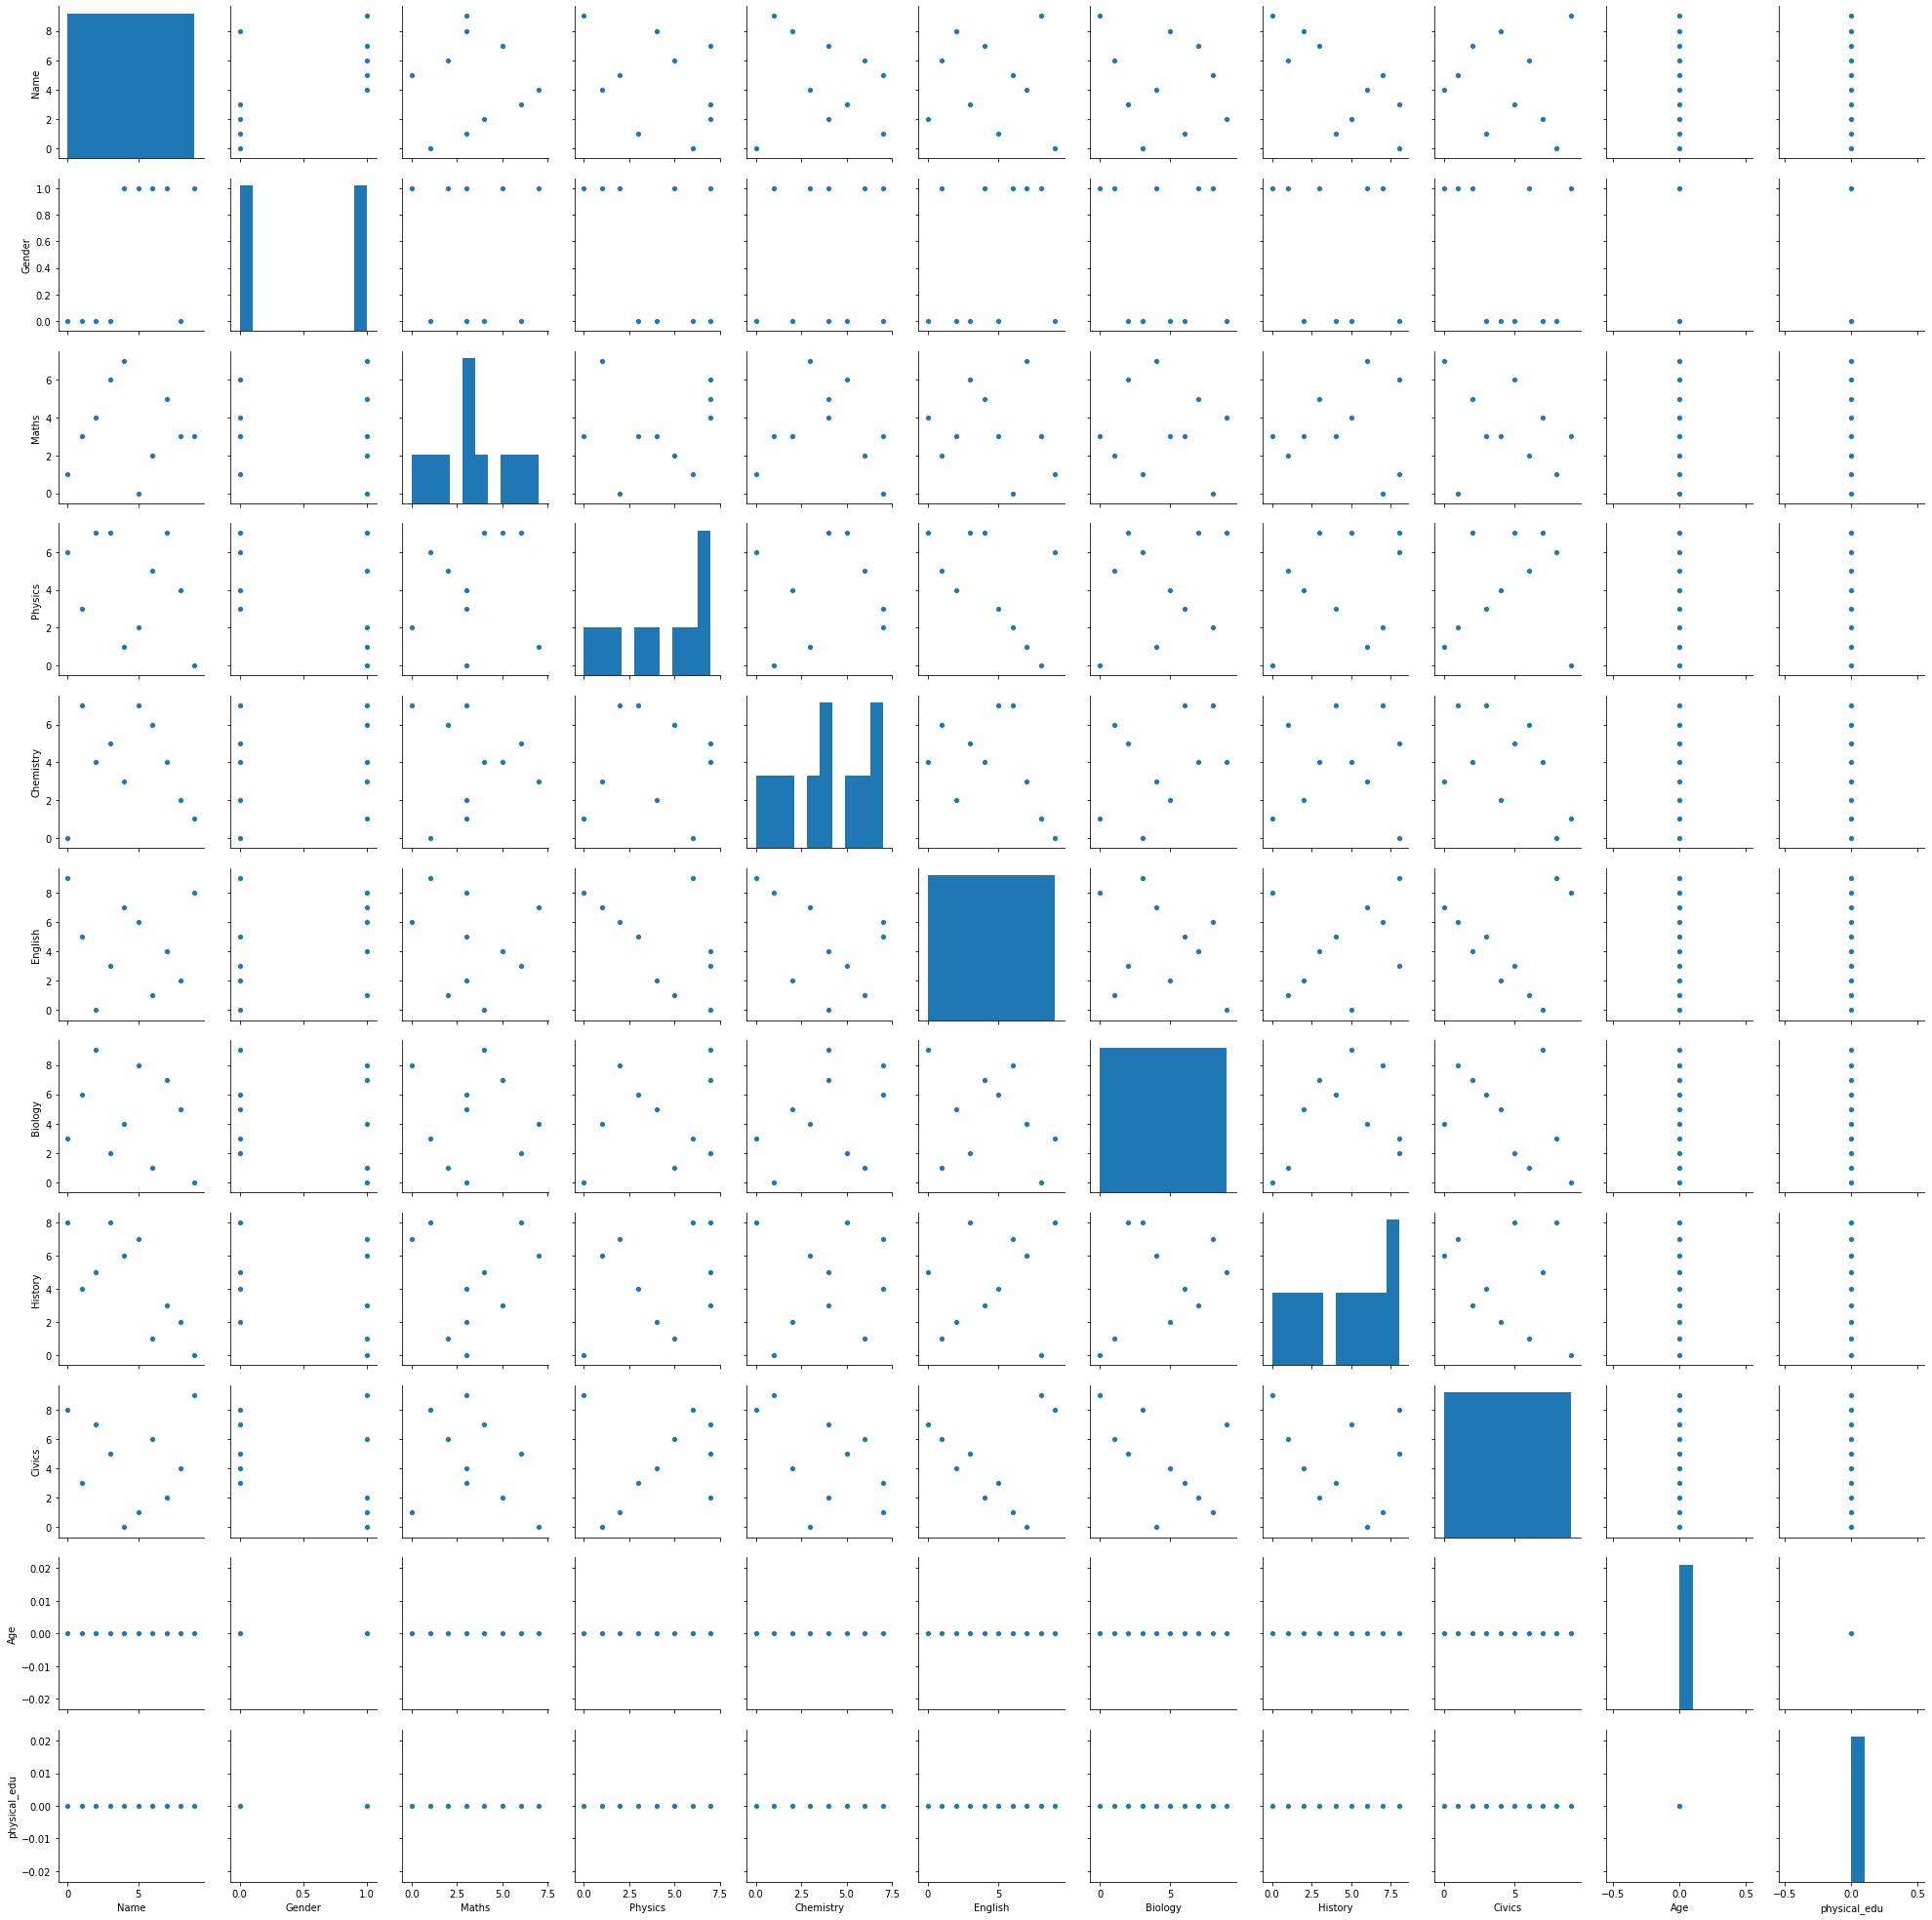

In [35]:
sns.pairplot(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020206442F98>,
      dtype=object)

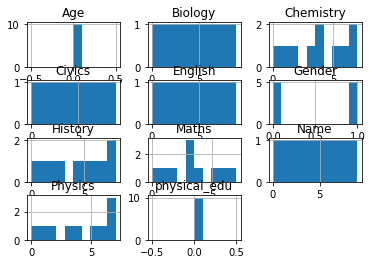

In [36]:
df.hist()

C:\Users\Karan\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Karan\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\Karan\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:100: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000202068183C8>,
      dtype=object)

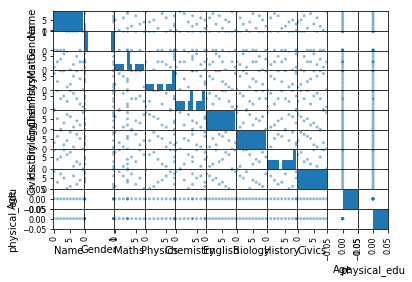

In [37]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)